In [ ]:
!pip install opencv-python-headless
import cv2
import numpy as np
from google.colab import output
from IPython.display import Image, display
import time


<IPython.core.display.Javascript object>

Captured image saved as: photo.jpg


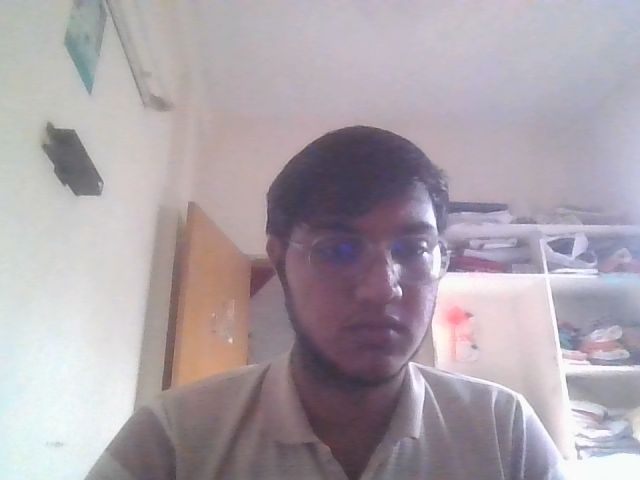

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab import output
import cv2
import numpy as np
import base64

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = '📸 Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);

      stream.getVideoTracks()[0].stop();
      div.remove();
      video.remove();

      const dataUrl = canvas.toDataURL('image/jpeg', quality);
      return dataUrl;
    }
    ''')
    display(js)

    data = output.eval_js('takePhoto({})'.format(quality))
    binary = base64.b64decode(data.split(',')[1])
    image = np.asarray(bytearray(binary), dtype="uint8")
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    cv2.imwrite(filename, image)
    return filename

# 📷 take photo
filename = take_photo()
print("Captured image saved as:", filename)
display(Image(filename=filename))


In [ ]:
filename = take_photo()
!mv photo.jpg background.jpg


<IPython.core.display.Javascript object>

In [ ]:
filename = take_photo()
!mv photo.jpg cloak_frame.jpg


<IPython.core.display.Javascript object>

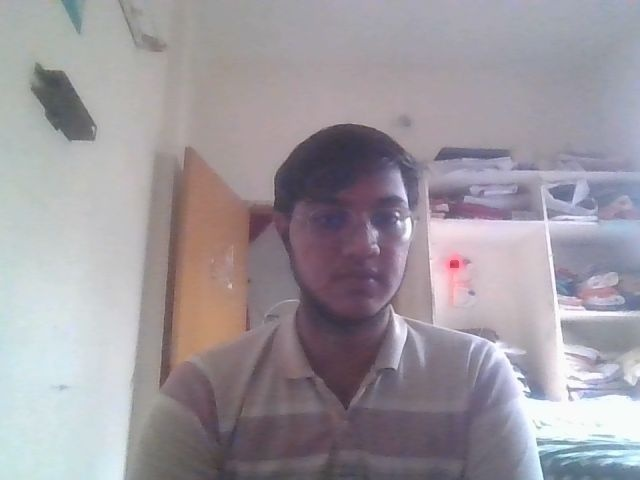

In [ ]:
background = cv2.imread("background.jpg")
frame = cv2.imread("cloak_frame.jpg")

hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# mask for RED cloak (change to green/blue ranges if needed)
lower1 = np.array([0, 120, 70])
upper1 = np.array([10, 255, 255])
lower2 = np.array([170, 120, 70])
upper2 = np.array([180, 255, 255])

mask1 = cv2.inRange(hsv, lower1, upper1)
mask2 = cv2.inRange(hsv, lower2, upper2)
mask = mask1 | mask2
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8), iterations=2)
mask = cv2.dilate(mask, np.ones((3,3), np.uint8), iterations=1)

inv_mask = cv2.bitwise_not(mask)
res1 = cv2.bitwise_and(frame, frame, mask=inv_mask)
res2 = cv2.bitwise_and(background, background, mask=mask)
final = cv2.addWeighted(res1, 1, res2, 1, 0)

cv2.imwrite("output_cloak.jpg", final)
display(Image(filename="output_cloak.jpg"))
